In [16]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import pandas as pd

In [18]:
import hopsworks

# project = hopsworks.login()
# fs = project.get_feature_store()
project = hopsworks.login(project="ID2223_23_lab1")
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/193693
Connected. Call `.close()` to terminate connection gracefully.


In [19]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [21]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [22]:
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [23]:
duplicate_rows = wine_df[wine_df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
4     white            7.2             0.230         0.32            8.50   
5     white            8.1             0.280         0.40            6.90   
7     white            7.0             0.270         0.36           20.70   
8     white            6.3             0.300         0.34            1.60   
39    white            7.3             0.240         0.39           17.95   
...     ...            ...               ...          ...             ...   
6461    red            7.2             0.695         0.13            2.00   
6462    red            7.2             0.695         0.13            2.00   
6465    red            7.2             0.695         0.13            2.00   
6479    red            6.2             0.560         0.09            1.70   
6494    red            6.3             0.510         0.13            2.30   

      chlorides  free sulfur dioxide  total sulfur dioxide 

In [24]:
wine_df = wine_df.drop_duplicates()

In [25]:
wine_df = wine_df.dropna()

In [26]:
wine_df 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
wine_df['quality'].value_counts()

6    2311
5    1745
7     852
4     204
8     148
3      30
9       5
Name: quality, dtype: int64

### Exploratory Data Analysis (EDA)  our Iris Data
Let's look at our wine data- the distribution and range of values for the 12 different features
  * type	
  * fixed acidity	
  * volatile acidity	
  * citric acid	
  * residual sugar	
  * chlorides	
  * free sulfur dioxide	
  * total sulfur dioxide	
  * density	
  * pH	
  * sulphates	
  * alcohol	
 and the target variable is `quality`.

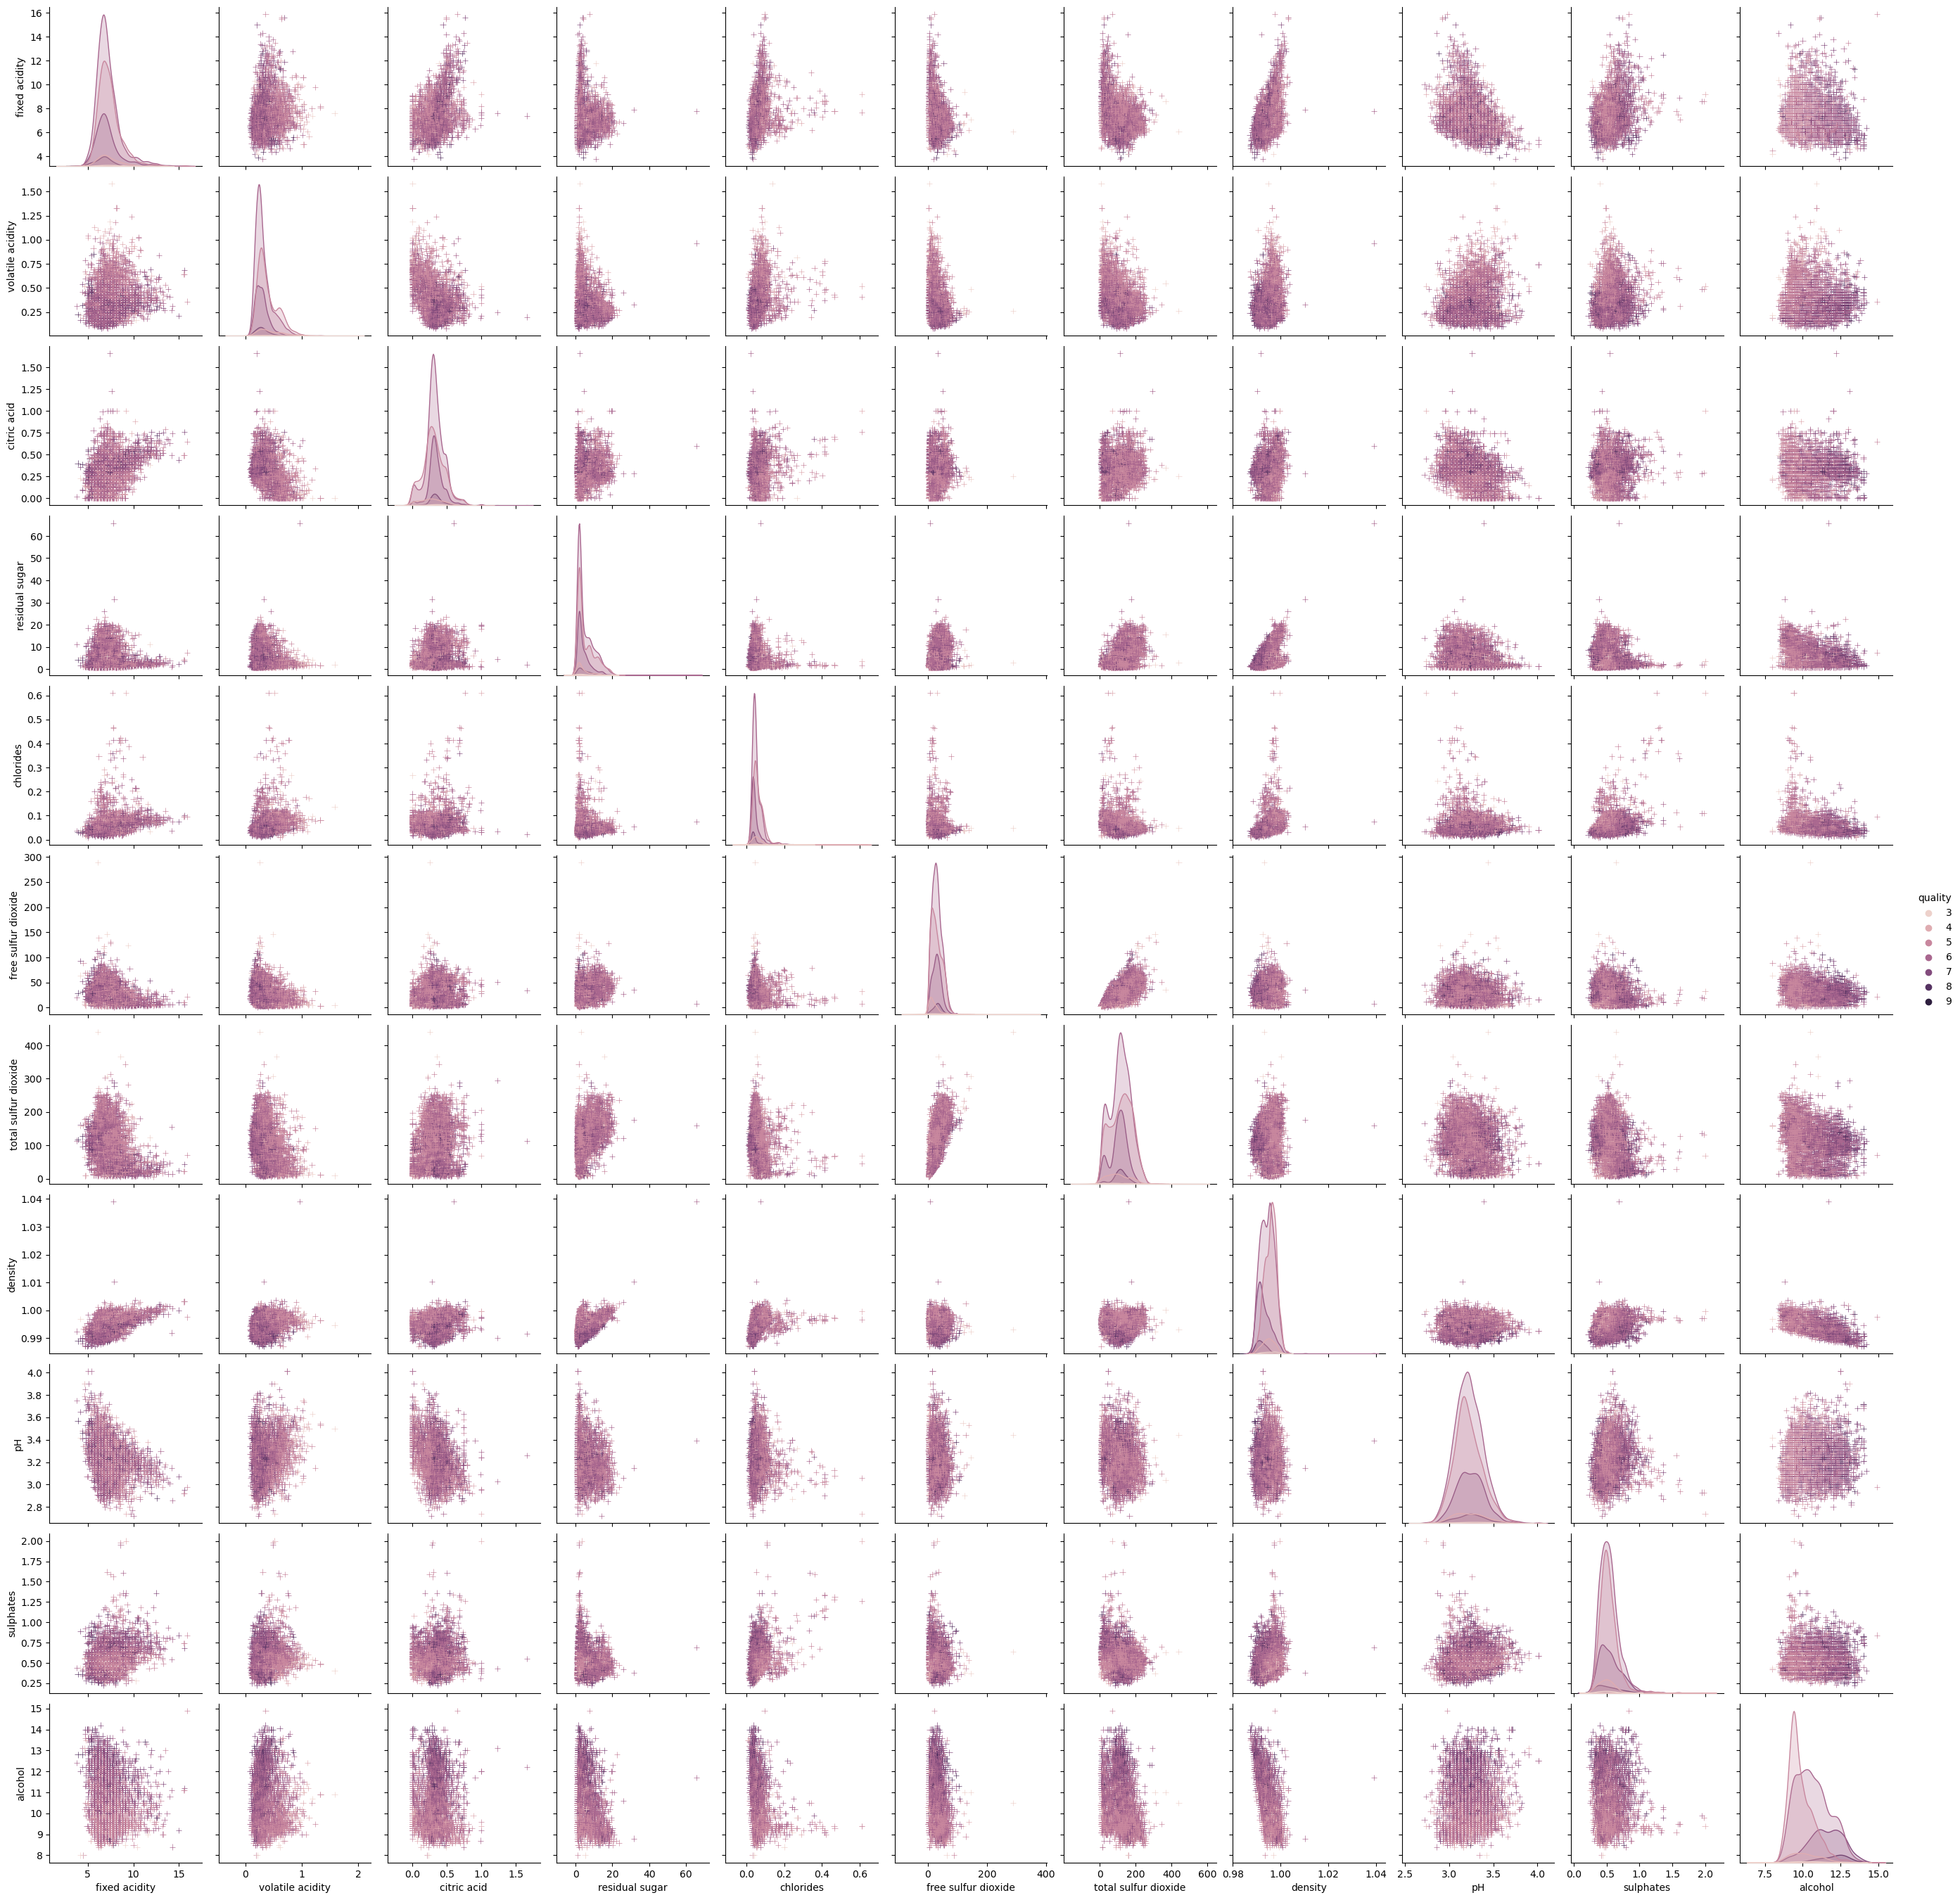

In [28]:
g = sns.pairplot(wine_df, hue='quality', markers='+')
plt.show()

### Visualize range of values 

We want to design a simulator generate the 3 types of iris flower (setosa, versicolor, virginica).
To do this, we can visualize the range of values for the length and width of the sepal and petal for each of the 3 flowers.

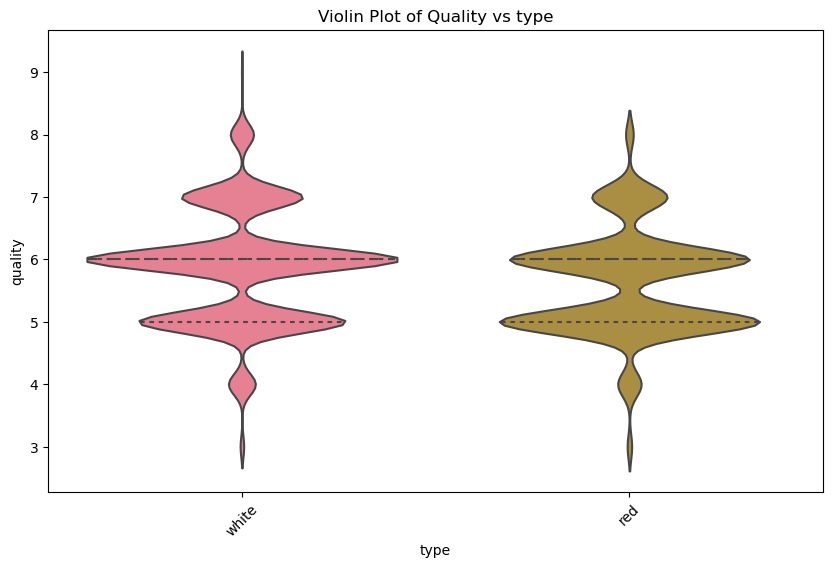

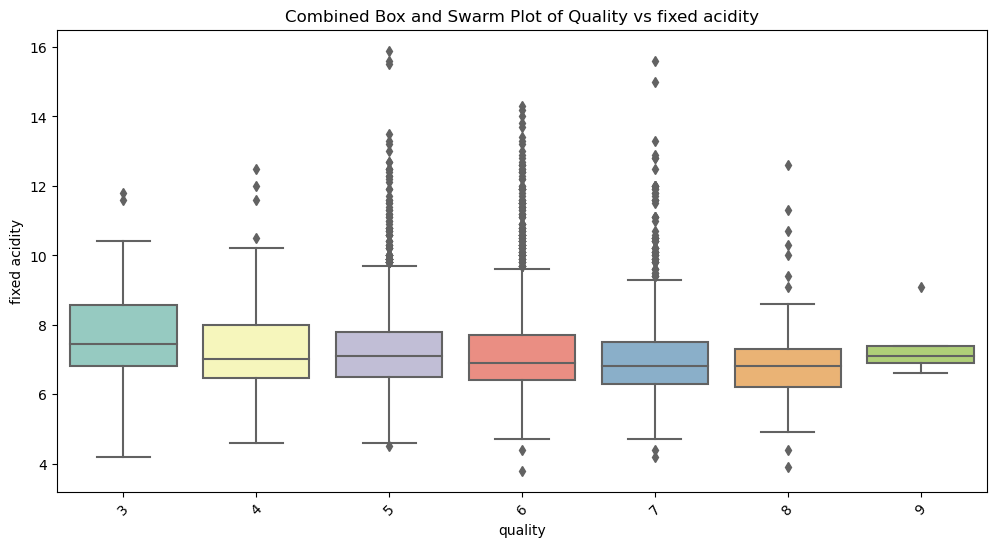

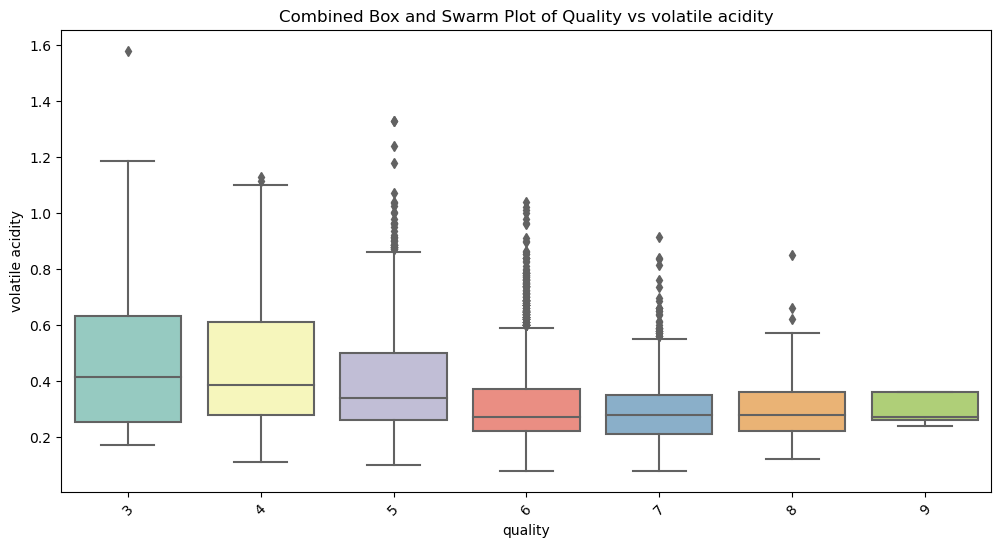

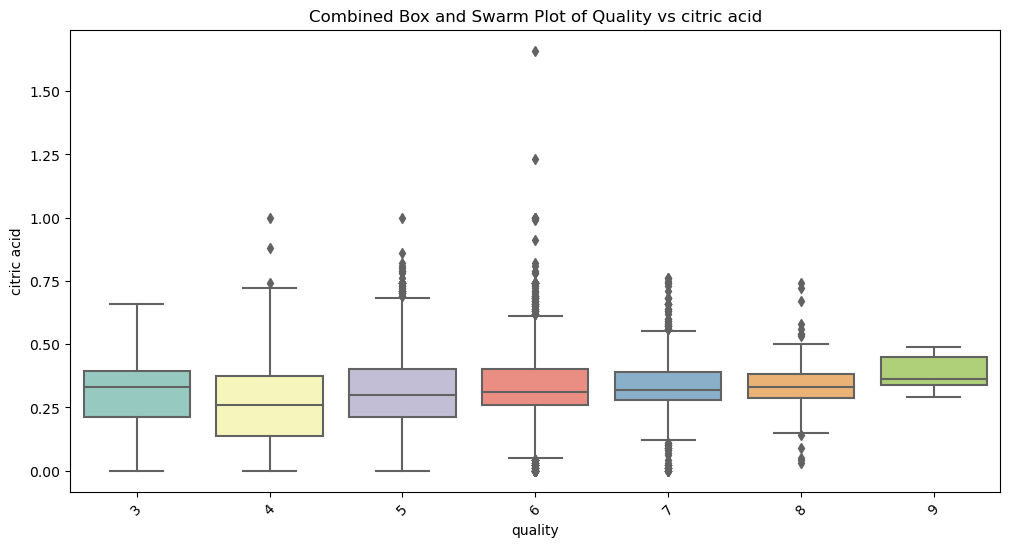

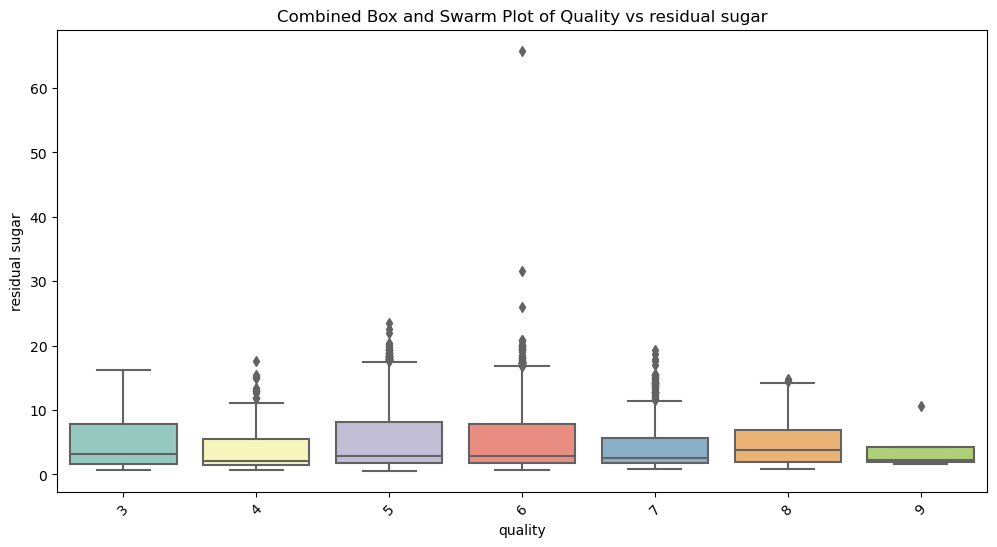

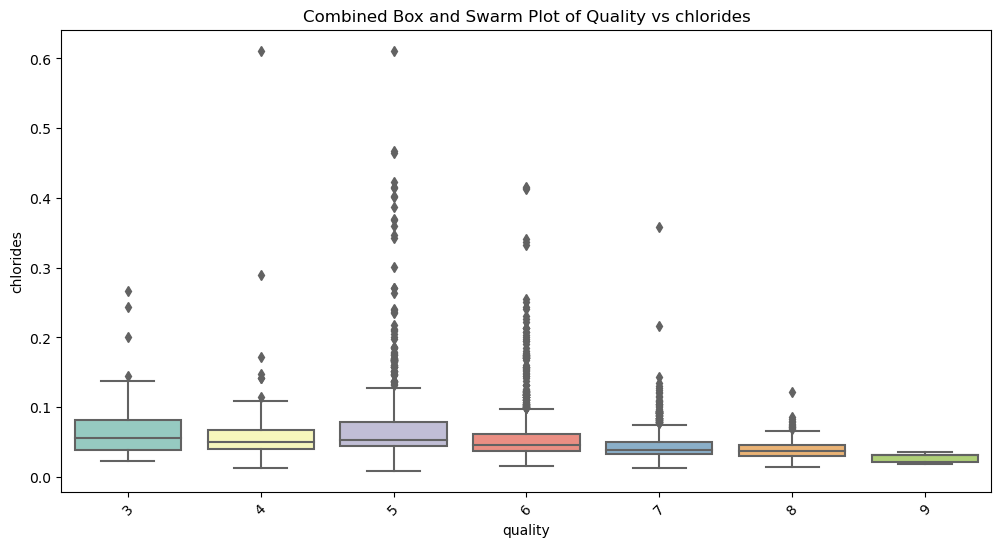

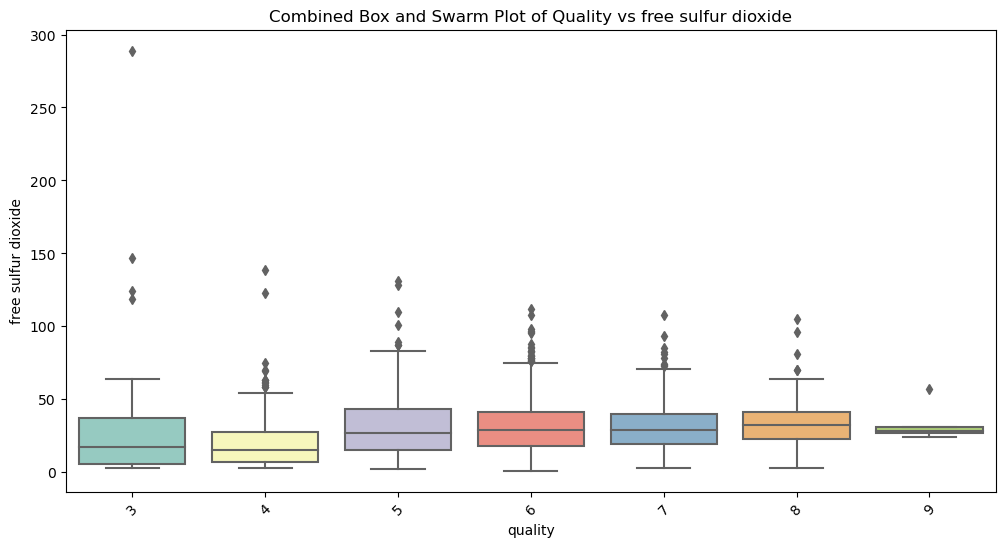

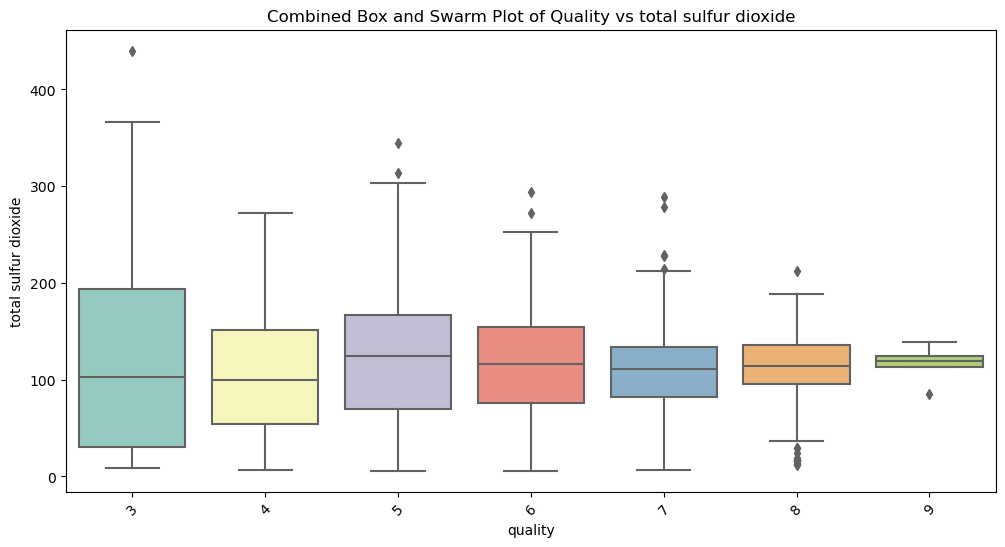

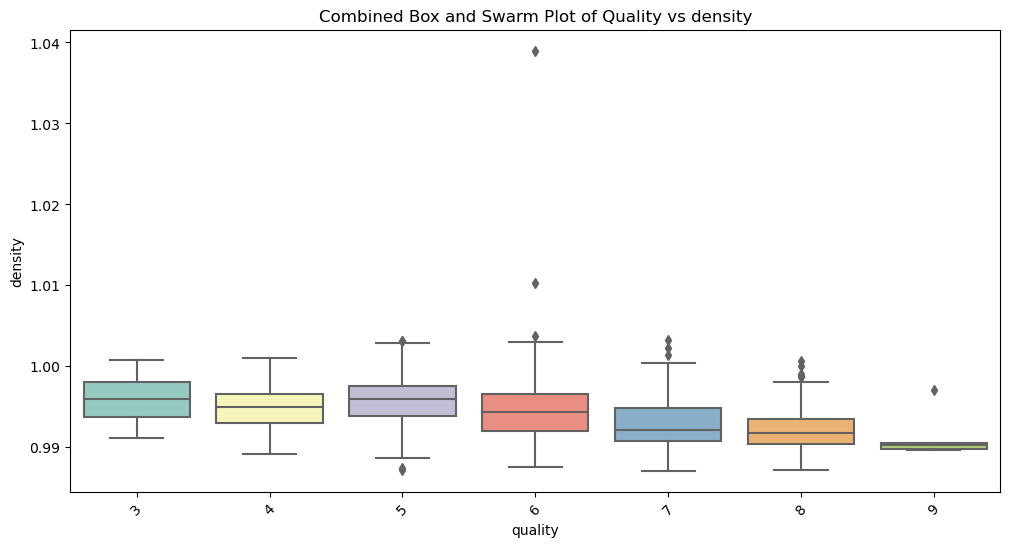

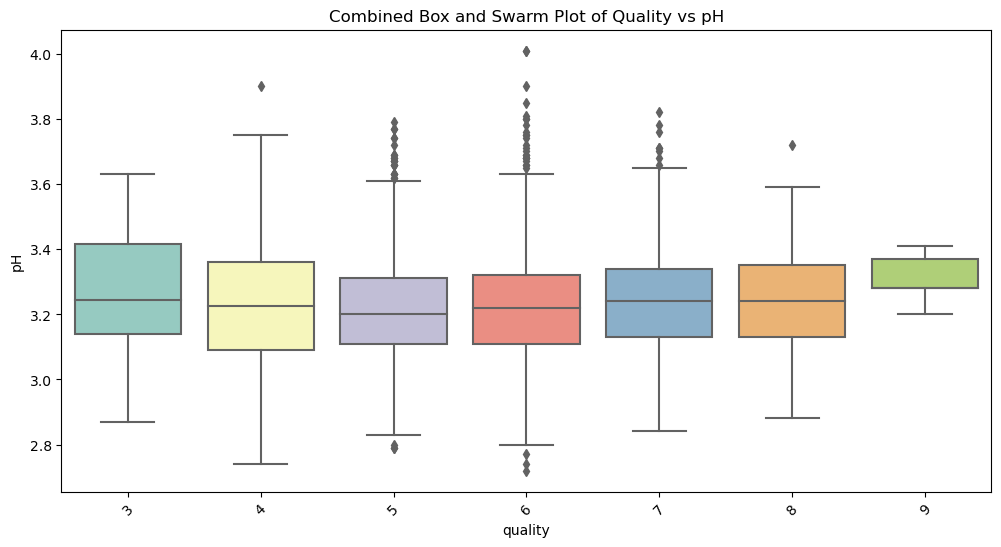

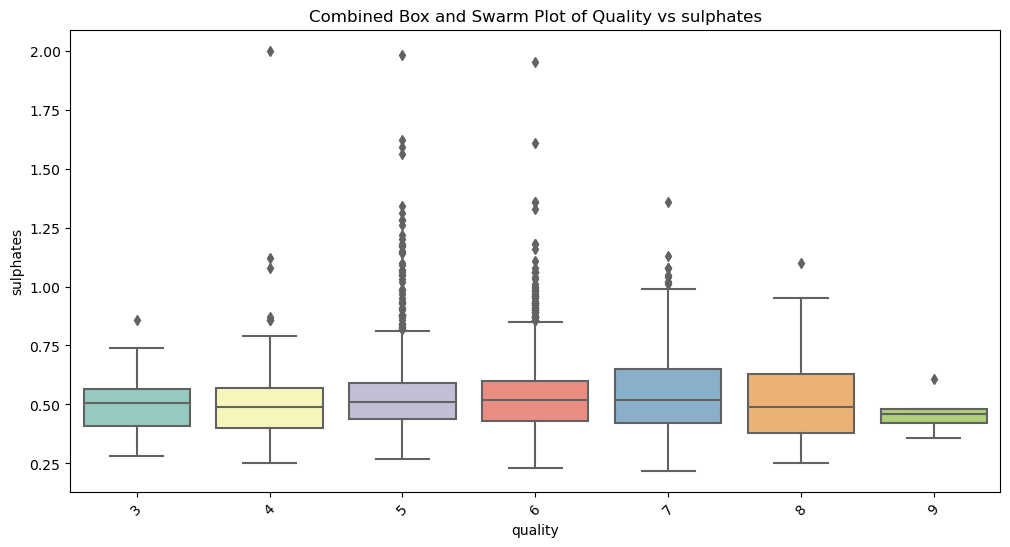

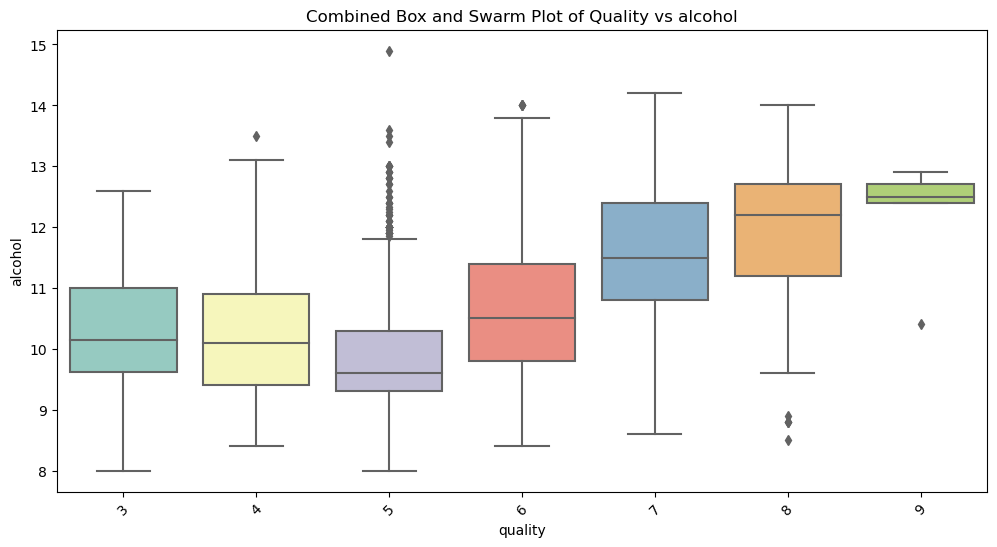

In [29]:
cat_var = 'type'  
cont_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates', 'alcohol']  

plt.figure(figsize=(10, 6))
sns.violinplot(x=cat_var, y='quality', data=wine_df, inner='quartile')
plt.title(f'Violin Plot of Quality vs {cat_var}')
plt.xticks(rotation=45)
plt.show()

for var in cont_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='quality', y=var, data=wine_df, palette="Set3")
    plt.title(f'Combined Box and Swarm Plot of Quality vs {var}')
    plt.xticks(rotation=45)
    plt.show()

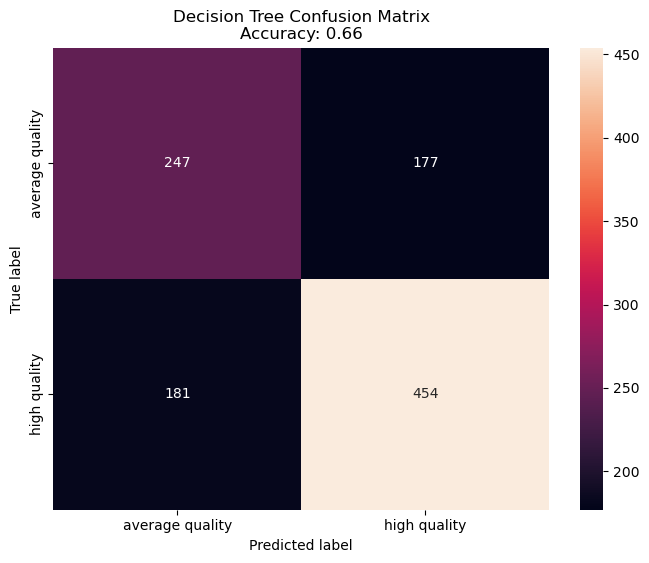

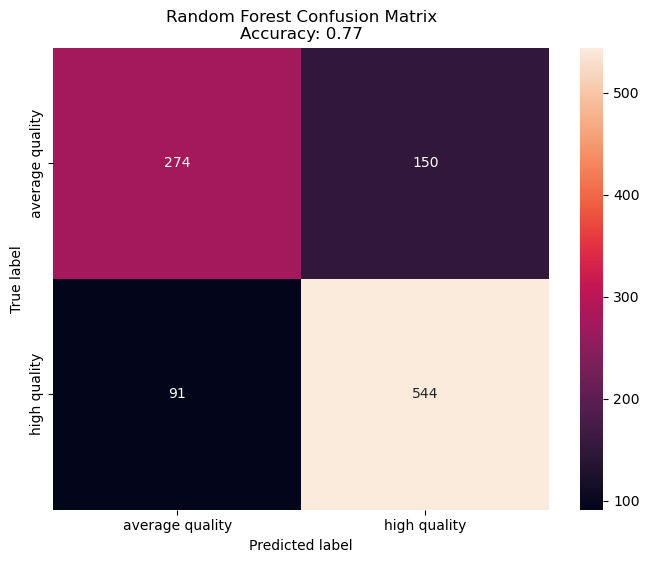

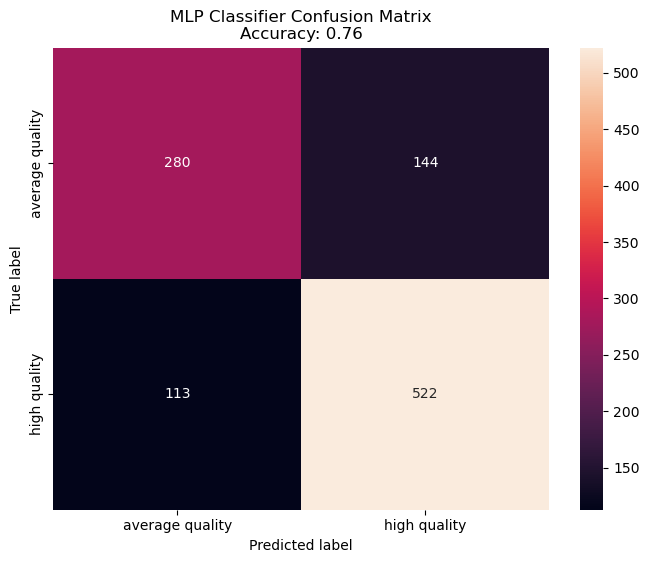

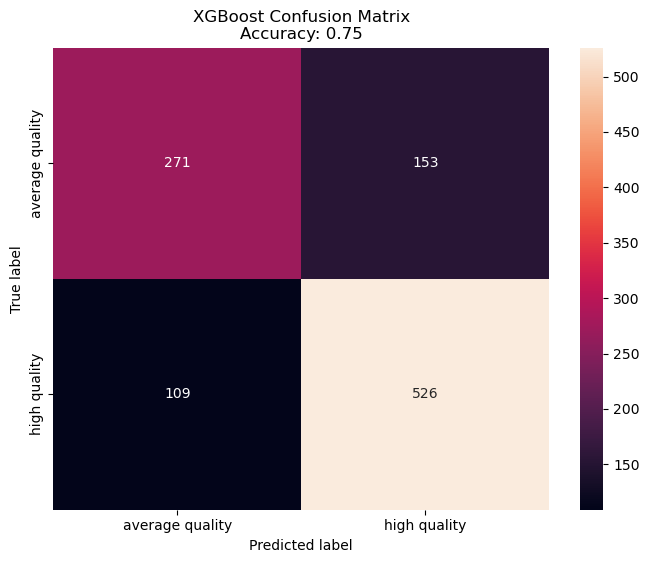

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

wine_df.loc[wine_df['type']== 'red', 'type']= float(0)
wine_df.loc[wine_df['type']== 'white', 'type']= float(1)
wine_df['type'] = wine_df['type'].astype(float)

def map_quality(quality):
    if quality in [3, 4, 5]:
        return 0
    else:  # 6，7, 8, 9
        return 1

wine_df['quality'] = wine_df['quality'].apply(map_quality)
wine_df_encoded = wine_df.copy()

X = wine_df_encoded.drop('quality', axis=1)
y = wine_df_encoded['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', xticklabels=['average quality', 'high quality'], yticklabels=['average quality', 'high quality'])
    plt.title(f'{name} Confusion Matrix\nAccuracy: {accuracy:.2f}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [31]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
6,1.0,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


### Insert our Wine DataFrame into a FeatureGroup
Let's write our historical iris feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [32]:
wine_df_encoded.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
6,1.0,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


In [33]:
wine_df_encoded.columns = [col.replace(' ', '_') for col in wine_df_encoded.columns]

In [34]:
wine_df_encoded.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
6,1.0,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
grouped = wine_df_encoded.groupby('quality')

stats_0 = grouped.get_group(0).drop('quality', axis=1).describe()
stats_1 = grouped.get_group(1).drop('quality', axis=1).describe()

print("Statistics for 'quality' = 0:")
print(stats_0)

print("\nStatistics for 'quality' = 1:")
print(stats_1)

with open('stats_0.txt', 'w') as file:
    file.write(stats_0.to_string())

with open('stats_1.txt', 'w') as file:
    file.write(stats_1.to_string())

Statistics for 'quality' = 0:
              type  fixed_acidity  volatile_acidity  citric_acid  \
count  1979.000000    1979.000000       1979.000000  1979.000000   
mean      0.677615       7.340298          0.402936     0.302127   
std       0.467508       1.287892          0.193436     0.163985   
min       0.000000       4.200000          0.100000     0.000000   
25%       0.000000       6.500000          0.260000     0.200000   
50%       1.000000       7.100000          0.340000     0.290000   
75%       1.000000       7.900000          0.520000     0.400000   
max       1.000000      15.900000          1.580000     1.000000   

       residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
count     1979.000000  1979.000000          1979.000000           1979.000000   
mean         5.312936     0.065659            28.968924            117.726630   
std          4.725881     0.045165            19.953153             62.382412   
min          0.600000     0.00900

In [20]:
wine_df_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=["type", "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", 
             "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", 
             "pH", "sulphates", "alcohol"], 
    description="Wine_quality_dataset")
wine_df_fg.insert(wine_df_encoded)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/193693/fs/193612/fg/233838


Uploading Dataframe: 0.00% |          | Rows 0/5295 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/193693/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7fc55d19d3a0>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent wine data from being written your your feature group if you write values outside the expected ranges.

In [11]:
# from great_expectations.core import ExpectationSuite, ExpectationConfiguration

# def expect(suite, column, min_val, max_val):
#     suite.add_expectation(
#     ExpectationConfiguration(
#         expectation_type="expect_column_values_to_be_between",
#         kwargs={
#             "column":column, 
#             "min_value":min_val,
#             "max_value":max_val,
#         }
#     )
# )

In [12]:
# suite = ExpectationSuite(expectation_suite_name="iris_dimensions")

# expect(suite, "sepal_length", 4.5, 8.0)
# expect(suite, "sepal_width", 2.1, 4.5)
# expect(suite, "petal_length", 1.2, 7)
# expect(suite, "petal_width", 0.2, 2.5)
# iris_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")    

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/193693/fs/193612/fg/211287
